In [276]:
from sklearn import datasets
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [277]:
iris_X = iris.data
iris_y = iris.target

In [278]:
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-40]]
iris_y_train = iris_y[indices[:-40]]
iris_X_valid = iris_X[indices[-40:-20]]
iris_y_valid = iris_y[indices[-40:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

In [279]:
svc = svm.SVC(C = 2, kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

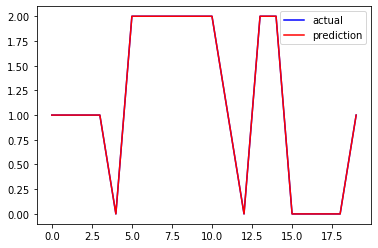

In [280]:
pred = svc.predict(iris_X_valid)
actual = iris_y_valid
plt.plot(actual, color = 'b', label = 'actual')
plt.plot(pred, color = 'r', label = 'prediction')
plt.legend()

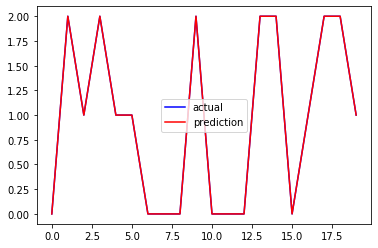

In [281]:
pred = svc.predict(iris_X_test)
actual = iris_y_test
plt.plot(actual, color = 'b', label = 'actual')
plt.plot(pred, color = 'r', label = 'prediction')
plt.legend()

In [282]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [283]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    return xx, yy

In [284]:
iris = datasets.load_iris()

In [285]:
iris_X = iris.data[:, :2]
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-40]]
iris_y_train = iris_y[indices[:-40]]
iris_X_valid = iris_X[indices[-40:-20]]
iris_y_valid = iris_y[indices[-40:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

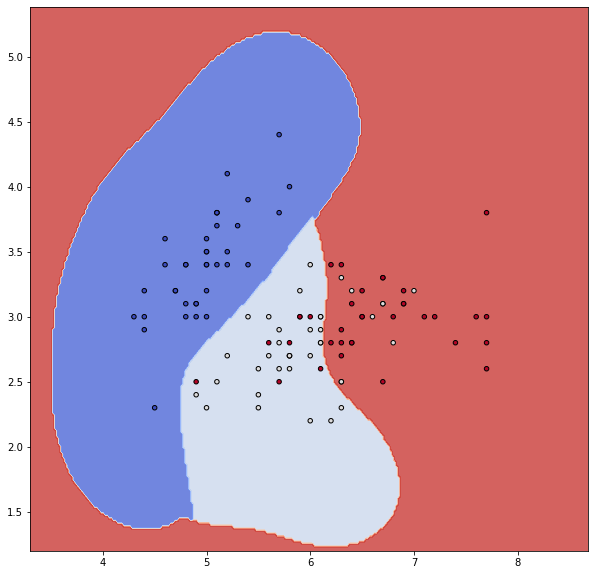

In [294]:
svc = svm.SVC(kernel='rbf', gamma=3, C=2)
pred = svc.fit(iris_X_train, iris_y_train)
U, V = iris_X_train[:, 0], iris_X_train[:, 1]
xx, yy = make_meshgrid(U, V)
figsize = 10
fig = plt.figure(figsize=(figsize,figsize))
ax = plt.subplot(111)
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_xlim(xx.min(), xx.max())

ax.set_ylim(yy.min(), yy.max())
plt.show()